# <a style = background:lightgreen;color:black>Outcome and Duration Prediction on train_od (preprocessing) </a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_od = pd.read_csv('../DATA/train_od.csv')

In [3]:
del train_od['Unnamed: 0']

`Date` is the starting date of the case. Notice that each case identifier may have more starting dates (it is obvious if you think that there may be the same case identifier for different cities). 

In [4]:
train_od['Date'] = pd.to_datetime(train_od['Date'])

`Value` is the monetary value of the lawsuit. Example: I got a traffic ticket for speeding of 500€ and I appel to court (the 500€ of the ticket represents the value of the lawsuit). It is formatted as string, we have to remove the 'Euro' and take just the number, moreover, we have to remove the point which in Italy is used to separate the thousands.

In [5]:
train_od['Value formatted'] = pd.to_numeric(train_od['Value']\
    .str.replace('Euro ', '').str.replace('.','').str.replace(',', '.'), errors='coerce')
    
del train_od['Value']

/var/folders/j3/6zzd1jr16pb3yxx70_376pmw0000gn/T/ipykernel_20179/1880134183.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train_od['Value formatted'] = pd.to_numeric(train_od['Value']\


In [77]:
# # THIS IS A VERSION OF THE PREVIOUS CELL WRITTEN BY HAND

# taxes_string = np.array(train_od['Value'])

# taxes_string_number = [string[5:] for string in taxes_string]

# taxes_number = []
# for value_string_wrong in taxes_string_number:
#     value_string = ''
#     for chr_ in value_string_wrong:
#         if chr_ != '.' and chr_ != ',':
#             value_string += chr_
#         elif chr_ == ',':
#             value_string += '.'
#     taxes_number.append(float(value_string)) # we need to transform the number in float

# train_od['Value formatted'] = taxes_number
# del train_od['Value']

`Unified Contribution` is the monetary cost for starting the lawsuit. Basically, to start a lawsuit there is the need of a "budget" that is the unified contribution.
The unified contribution depends from the value of the lawsuit. 
The following are the unified contribution tables (of the first lawsuit grade) valid since the 25/06/2014 (first one) and before (second one).

<a style=color:deepskyblue>$$SINCE - 25/06/2014 (First Grade)$$ </a>
<table>
    <tr> <td> Lawsuit value</td> <td> Unified contribution</td> </tr>
    <tr> <td> 0€</td> <td>43€, 237€ and 98€ </td> </tr>
    <tr> <td> 1€-1000€</td> <td> 43€</td> </tr>
    <tr> <td> 1000.01€-1100€</td> <td> 43€</td> </tr>
    <tr> <td> 1100.01€-5200€ </td> <td> 98€</td> </tr>
    <tr> <td> 5200.01€-26000€</td> <td> 237€</td> </tr>
    <tr> <td> 26000.01€-52000€</td> <td> 518€</td> </tr>
    <tr> <td> 52000.01€-260000€</td> <td> 759€</td> </tr>
    <tr> <td> 260000.01€-520000€</td> <td> 1214€</td> </tr>
    <tr> <td> 520000.01€-∞</td> <td> 1686€</td> </tr>
</table>

<a style=color:deepskyblue> $$BEFORE - 25/06/2014 (First Grade)$$</a> 
<table>
    <tr> <td> Lawsuit value</td> <td> Unified contribution</td> </tr>
    <tr> <td> 0€</td> <td>37€, 85€, 206€ and 450€</td> </tr>
    <tr> <td> 1€-1000€</td> <td>37€ </td> </tr>
    <tr> <td> 1000.01€-1100€</td> <td>37€ </td> </tr>
    <tr> <td> 1100.01€-5200€ </td> <td>85€ </td> </tr>
    <tr> <td> 5200.01€-26000€</td> <td>206€ </td> </tr>
    <tr> <td> 26000.01€-52000€</td> <td>450€ </td> </tr>
    <tr> <td> 52000.01€-260000€</td> <td>660€ </td> </tr>
    <tr> <td> 260000.01€-520000€</td> <td>1056€ </td> </tr>
    <tr> <td> 520000.01€-∞</td> <td> 1466€</td> </tr>
</table>

Moreover, this field is formatted as the Value column was formatted, so we have to remove 'Euro' and convert the field as float. It's name will be Unified Contribution formatted.

In [6]:
train_od['Unified Contribution formatted'] = pd.to_numeric(train_od['Unified Contribution']\
    .str.replace('Euro ', '').str.replace('.','').str.replace(',', '.'), errors='coerce')
    
del train_od['Unified Contribution']

/var/folders/j3/6zzd1jr16pb3yxx70_376pmw0000gn/T/ipykernel_20179/4082647123.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train_od['Unified Contribution formatted'] = pd.to_numeric(train_od['Unified Contribution']\


In [79]:
# # THIS IS A VERSION OF THE PREVIOUS CELL WRITTEN BY HAND

# un_contr_string = train_od['Unified Contribution']

# un_contr_string_number =[]
# for string in un_contr_string:
#     if pd.isna(string)==False:
#         un_contr_string_number.append(string[5:])
#     else:
#         un_contr_string_number.append(pd.NA)

# un_contr_number = []
# for value_string_wrong in un_contr_string_number:
#     value_string = ''
#     if pd.isna(value_string_wrong)==False:
#         for chr_ in value_string_wrong:
#             if chr_ != '.' and chr_ != ',':
#                 value_string += chr_
#             elif chr_ == ',':
#                 value_string += '.'
#         un_contr_number.append(float(value_string)) # we need to transform the number in float
#     else:
#         un_contr_number.append(pd.NA)

# train_od['Unified Contribution formatted'] = un_contr_number
# del train_od['Unified Contribution']

In the following chunks we create a function which returns the indexes of the rows which are probably anomalies. To do this we check in each row the value of Value formatted. If the value formatted is in a given range, then its Unified Contribution formatted must be in a given range to be a correct value (the tables are shown above: there are two of them because after the 25th June 2014 they changed). If the Unified Contribution is not in that range, then the function append the index in the anomalies_index list. Notice the following things:  

* The NaN are not considered because otherwise pd.NA in [1,2,3] returns an error. We will analyze them separetely.
* We are considering two tables because after the 25th June 2014 they changed.
* We are considering the Value formatted transformed in integers because the values with float are far from the boundaries and so there is no danger that a row ends up in another range when we consider it as int.
* We create also a function (unified_contribution_calculator) which gets the array of the "standard" values of the unified contribution like the ones you've seen in the previous table and returns an array with these values, these values multipled by 0.5, these values multipied by 1.5 and these values multiplied by 2. We did this in order to eliminate just the obvious anomalies.


In [7]:
def retrieve_oddness(data, range_table):
        '''
        This function iterates through each row of the data and through each row in range_table and
        if the Value formatted of a row in the data is in a range of the Lawsuit Value, then it is checked also if 
        the Unified Contribution of that row is in the right Unified Contribution range.
        '''
        anomalies_index = []
        
        for row_index_data in range(len(data)):
            for row_index_table in range(len(range_table)):
                if int(data.iloc[row_index_data]['Value formatted']) in range_table.iloc[row_index_table]['Lawsuit Value']:
                    if data.iloc[row_index_data]['Unified Contribution formatted'] not in range_table.iloc[row_index_table]['Unified Contribution']:
                        anomalies_index.append(row_index_data)
                    break # once we find the right row (value-unified contribution) we don't need to check the ones below
                        
        return anomalies_index

In [8]:
def unified_contribution_calculator(in_array):
    out_array = list(in_array*0.5)+list(in_array*1)+list(in_array*1.5)+list(in_array*2)
    return np.sort(np.array(out_array))

The unified_contribution_calculator will be fed with the values of the first grade and the values of the second grade (which are the values of the first grade multiplied by 1.5).

In [10]:
table_range_since_25_06_2014 = pd.DataFrame({
    'Lawsuit Value': [[0],np.arange(1,1101),np.arange(1101,5201),np.arange(5201,26001),np.arange(26001,52001),np.arange(52001,260001),np.arange(260001,520001),np.arange(520001, 3500000)],
    'Unified Contribution' : [unified_contribution_calculator(np.array([43,98,237,259,518,43*1.5,98*1.5,237*1.5,259*1.5,518*1.5])),
                              unified_contribution_calculator(np.array([43,43*1.5])),
                              unified_contribution_calculator(np.array([98,98*1.5])),
                              unified_contribution_calculator(np.array([237,237*1.5])),
                              unified_contribution_calculator(np.array([518,518*1.5])),
                              unified_contribution_calculator(np.array([759,759*1.5])),
                              unified_contribution_calculator(np.array([1214,1214*1.5])),
                              unified_contribution_calculator(np.array([1686,1686*1.5]))]
})

table_range_before_25_06_2014 = pd.DataFrame({
    'Lawsuit Value': [[0],np.arange(1,1101),np.arange(1101,5201),np.arange(5201,26001),np.arange(26001,52001),np.arange(52001,260001),np.arange(260001,520001),np.arange(520001,3500000)],
    'Unified Contribution' : [unified_contribution_calculator(np.array([37,85,206,450,37*1.5,85*1.5,206*1.5,450*1.5])),
                              unified_contribution_calculator(np.array([37,37*1.5])),
                              unified_contribution_calculator(np.array([85,85*1.5])),
                              unified_contribution_calculator(np.array([206,206*1.5])),
                              unified_contribution_calculator(np.array([450,450*1.5])),
                              unified_contribution_calculator(np.array([660,660*1.5])),
                              unified_contribution_calculator(np.array([1056,1056*1.5])),
                              unified_contribution_calculator(np.array([1466,1466*1.5]))]
})

train_od_since_25_06_2014_complete = train_od.loc[train_od['Date']>='2014-06-25'][['ID','Value formatted', 'Unified Contribution formatted']]
train_od_since_25_06_2014_not_NA = train_od_since_25_06_2014_complete.dropna()  
train_od_before_25_06_2014_complete = train_od.loc[train_od['Date']<'2014-06-25'][['ID','Value formatted', 'Unified Contribution formatted']]
train_od_before_25_06_2014_not_NA = train_od_before_25_06_2014_complete.dropna() 

In [11]:
# This cell takes about 38 seconds to run
anomalies_index_since_25_06_2014 = retrieve_oddness(train_od_since_25_06_2014_not_NA, table_range_since_25_06_2014)

anomalies_ID_since_25_06_2014 = []

for idx in anomalies_index_since_25_06_2014:
    anomalies_ID_since_25_06_2014.append(train_od_since_25_06_2014_not_NA.iloc[idx]['ID'])

anomalies_index_before_25_06_2014 = retrieve_oddness(train_od_before_25_06_2014_not_NA, table_range_before_25_06_2014)

anomalies_ID_before_25_06_2014 = []

for idx in anomalies_index_before_25_06_2014:
    anomalies_ID_before_25_06_2014.append(train_od_before_25_06_2014_not_NA.iloc[idx]['ID'])

df_anomaly_since_25_06_2014 = train_od.loc[train_od['ID'].isin(anomalies_ID_since_25_06_2014)]

df_anomaly_before_25_06_2014 = train_od.loc[train_od['ID'].isin(anomalies_ID_before_25_06_2014)]

<a style=color:deepskyblue> After analyzing the anomalies obtained with these function, we have decided to remove them from the data. This because they are just 4706+2298 rows (2.44% of train_od) and so it's not worth trying to substitute wrong values with the ones which respect the unified contribution boundaries. Also, we've decided to remove the NA values because we couldn't find a reason why there is no value in there.

In [12]:
anomaly_IDs = list(df_anomaly_since_25_06_2014['ID'])+list(df_anomaly_before_25_06_2014['ID'])

train_od_no_anomaly = train_od.loc[~train_od['ID'].isin(anomaly_IDs)]

In [13]:
train_od_no_anomaly_NA = train_od_no_anomaly.loc[train_od_no_anomaly['Unified Contribution formatted'].isna()]
to_remove_anomalies = list(df_anomaly_before_25_06_2014['ID'])+list(df_anomaly_since_25_06_2014['ID'])
to_remove_NA = list(train_od_no_anomaly_NA['ID'])
train_od_cleaned = train_od.loc[~train_od['ID'].isin(to_remove_anomalies)]
train_od_cleaned = train_od_cleaned.loc[~train_od_cleaned['ID'].isin(to_remove_NA)]
# train_od_cleaned.to_csv('../DATA/train_od_cleaned.csv')

<a style=color:deepskyblue> From now we are going to use the train_od_cleaned dataset. </a>

`Primary Actor` is the accusing part. There are 110862 NaN values. It is meaningless to check how many are the unique values because they are encripted for privacy reasons.

`Secondary Actor` is always the accusing part. There are 253867 NaN values.

`Primary Defendant` is the defendant of the lawsuit. There are 111328 NaN values.

`Secondary Defendant` is the defendant of the lawsuit. There are 188832 NaN values.

`Number of Lawyers`: lawyers of the actor + lawyers of the defendant

`Number of Legal Parties`:  the number of legal parties involved in the lawsuit

`Number of Persons`: number of attacked people .

`City of the judge’s office` is the city in which the judge's office is located. There are 20 cities in the dataset. As you can see in the following barplot, the cases are not balanced in the cities.

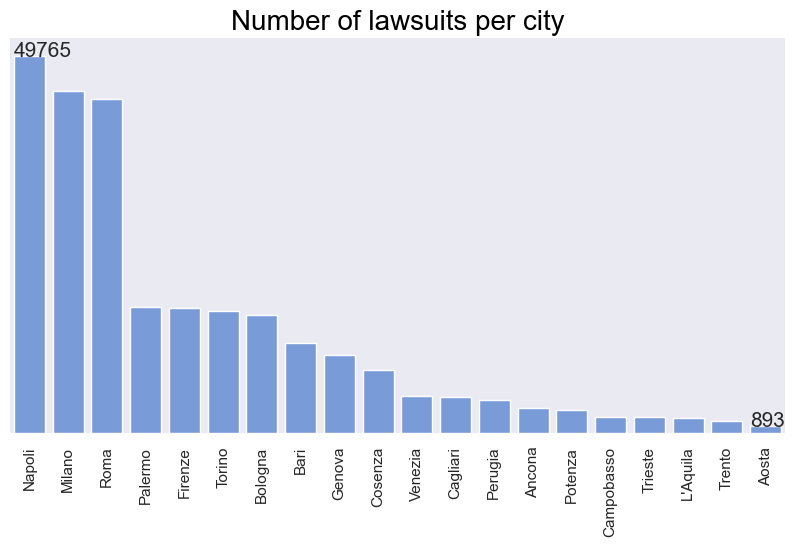

In [15]:
sns.set_theme(rc={"axes.spines.right": False,
                  "axes.spines.top": False,
                  'axes.spines.left': False,
                  'axes.spines.bottom': False})

f, axs = plt.subplots(1, figsize=(10,5))
    
sns.barplot(data = train_od_cleaned.groupby(['City of the judge’s office'])\
            .size().reset_index().rename(columns={0:'Count'})\
            .sort_values(['Count'], ascending=False),
            x='City of the judge’s office',
            y= 'Count',
            color='cornflowerblue',
            saturation=0.7,
           ax=axs)

bars = list(train_od_cleaned.groupby(['City of the judge’s office'])\
            .size().reset_index().rename(columns={0:'Count'})\
            .sort_values(['Count'], ascending=False)['City of the judge’s office'])

x_pos = np.arange(len(bars))
plt.xticks(x_pos, bars, rotation=90)
plt.subplots_adjust(bottom=0.2, top=0.99)

heights=np.array(train_od_cleaned.groupby(['City of the judge’s office'])\
            .size().reset_index().rename(columns={0:'Count'})\
            .sort_values(['Count'], ascending=False)['Count'])

plt.text(x = -0.4 , y = heights[0]+1, s = heights[0], size = 15)
plt.text(x = len(bars)-1.4 , y = heights[-1]+1, s = heights[-1], size = 15)
plt.xlabel('City of the judge’s office', fontsize=12)
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
plt.title('Number of lawsuits per city', fontsize=20, color='black')
plt.show()

`Duration`: How much the lawsuit lasts (in terms of days).

`Outcome`: result of the lawsuit.

<a style=color:deepskyblue> The last preprocessing steps are: 
* remove the observations where duration is lower than 0 (10963 observations (4% of the overall observations))
* remove the observations in which the date plus the duration exceed the 15 of October 2022 (when the data was provided to us)</a>.



In [16]:
train_od_cleaned = train_od_cleaned[train_od_cleaned['Duration'] > 0]

In [17]:
del train_od_cleaned['ID']
del train_od_cleaned['Primary Actor']
del train_od_cleaned['Secondary Actor']
del train_od_cleaned['Primary Defendant']
del train_od_cleaned['Secondary Defendant']

In [18]:
from datetime import datetime

train_od_cleaned['Date'] = pd.to_datetime(train_od_cleaned['Date'])

new_time = datetime.strptime('15/10/2022','%d/%m/%Y')

train_od_cleaned['lasture'] = new_time - train_od_cleaned['Date']

train_od_cleaned['lasture'] = train_od_cleaned['lasture'].astype('timedelta64[D]').astype(int)

train_od_cleaned = train_od_cleaned.loc[train_od_cleaned['lasture']>train_od_cleaned['Duration']]

del train_od_cleaned['lasture']

In [90]:
# train_od_cleaned.to_csv('../DATA/final_train_od.csv')

## <a style=background:yellow;color:black > Let's convert the variable 'City of the judge’s office' in One-Hot encoding </a>

In [19]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
data = pd.read_csv('../DATA/final_train_od.csv')

In [21]:
city_encoder = OneHotEncoder().fit(data[['City of the judge’s office']])

data = pd.concat([data,
  pd.DataFrame(city_encoder.transform(data[['City of the judge’s office']]).toarray(),columns=city_encoder.categories_)],
  axis=1).drop(['City of the judge’s office'],axis=1)

In [5]:
# # THIS IS A VERSION OF THE PREVIOUS CELL WRITTEN BY HAND
# cities = []
# for city in data['City of the judge’s office'].tolist() :

#     if city not in cities : 
#         cities.append(city)

# for city in cities : 
#     data[city] = np.zeros(len(data))

# for i in range(len(data)) : 
#     data[data['City of the judge’s office'].iloc[i]].iloc[i] = 1

# del data['City of the judge’s office']

In [22]:
object_encoder = OneHotEncoder().fit(data[['Object']])

data = pd.concat([data,
  pd.DataFrame(object_encoder.transform(data[['Object']]).toarray(),columns=object_encoder.categories_)],
  axis=1).drop(['Object'],axis=1)

In [7]:
# # THIS IS A VERSION OF THE PREVIOUS CELL WRITTEN BY HAND

# crimes=[]
# for crime in data['Object'].tolist() :

#     if crime not in crimes : 

#         crimes.append(crime)

# for crime in crimes : 

#     data[crime] = np.zeros(len(data))

# for i in range(len(data)) : 

#     data[data['Object'].iloc[i]].iloc[i] = 1

# del data['Object']

In [23]:
data['Tax Related'] = data['Tax Related'].fillna(0).replace(True, 1)

Let's analyze the spearman (not linear) correlation between the numerical columns of the dataset. As we can see from the following correlation matrix, there is a positive correlation between the number of lawyers and the Duration. It means that the more the number of lawyers, the more the lawsuit lasts (notice that this can be due to some spurious correlation).

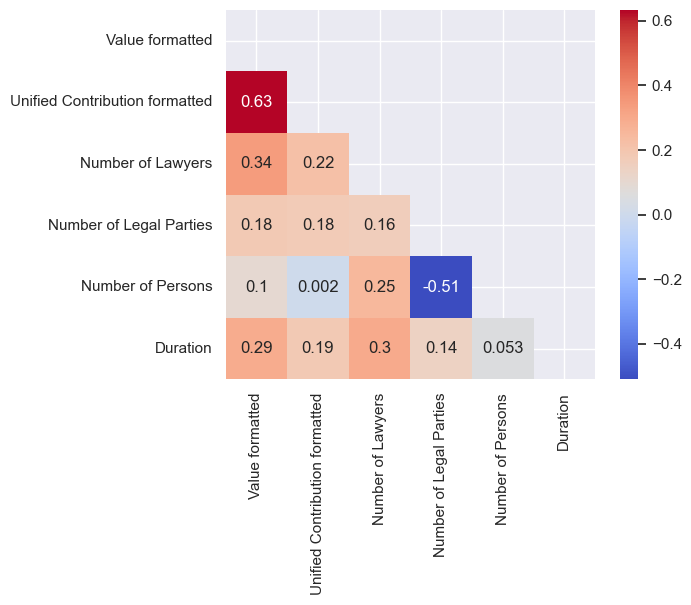

In [24]:
df_num = data[['Value formatted', 'Unified Contribution formatted', 'Number of Lawyers', 'Number of Legal Parties', 'Number of Persons', 'Duration']]

corr = df_num.corr('spearman')

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

dataplot = sns.heatmap(corr, cmap=plt.cm.coolwarm, annot=True,mask=mask, square=True)
plt.show()

The following chunk is needed in order to correct the name of the data columns.

In [25]:
new_var_names = []
for var_name in data.columns:
    if '(' not in var_name:
        new_var_names.append(var_name)
    else:
        new_var_names.append(var_name.replace('(', '').replace(')', '')
        .replace('\'','').replace(',','').replace('"',''))
new_var_names = []
for var_name in data.columns:
    if type(var_name) != tuple:
        new_var_names.append(var_name)
    else:
        new_var_names.append(var_name[0])

data = pd.DataFrame(data.values, columns=new_var_names)

In [11]:
# data.to_csv('../DATA/final_train_od_dummies.csv')